# Bitcoin, Fomo and Tweet

### 1.- Importamos las librerías y dataset

In [1]:
# manejo bbdd
import pandas as pd
import numpy as np
import datetime

#gráficas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#estadística
import math
from scipy.stats import norm
from scipy import stats #para box-cox entre otros
from scipy.stats import skew

#preprocesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#modelos y evaluación
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

#warnings
import warnings
warnings.filterwarnings('ignore')

### 2.- Importamos los dataset

In [5]:
bitcoin_fomo = pd.read_csv("/Users/davidmartinfernandez/Desktop/Ironhack/Proyectos/Bitcoin_Project/datasets/bitcoin_fomo.csv")

In [6]:
bitcoin_fomo

,Date,Value,Value_Classification,BTC_Closing,BTC_Volume
0,2018-02-01,30.0,Fear,9170.540039,9959400448
1,2018-02-02,15.0,Extreme Fear,8830.750000,12726899712
2,2018-02-03,40.0,Fear,9174.910156,7263790080
3,2018-02-04,24.0,Extreme Fear,8277.009766,7073549824
4,2018-02-05,11.0,Extreme Fear,6955.270020,9285289984
...,...,...,...,...,...
1880,2023-03-27,64.0,Greed,27139.888672,18188895178
1881,2023-03-28,59.0,Greed,27268.130859,17783600385
1882,2023-03-29,57.0,Greed,28348.441406,20684945906
1883,2023-03-30,60.0,Greed,28033.562500,22435349951


### 3.- EDA Dataset Bitcoin_fomo y tratamiento de variables

Realizamos un bitcoin_fomo.info()

In [8]:
bitcoin_fomo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1885 non-null   object 
 1   Value                 1882 non-null   float64
 2   Value_Classification  1882 non-null   object 
 3   BTC_Closing           1885 non-null   float64
 4   BTC_Volume            1885 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 73.8+ KB


Vemos que tenemos valores numericos y categoricos y que tenemos valores nulos en la variable Value y Value_Classification.

In [50]:
# miramos las 5 primeras filas.
bitcoin_fomo.head()

,Date,Value,Value_Classification,BTC_Closing,BTC_Volume
0,2018-02-01,30.0,Fear,9170.540039,9959400448
1,2018-02-02,15.0,Extreme Fear,8830.750000,12726899712
2,2018-02-03,40.0,Fear,9174.910156,7263790080
3,2018-02-04,24.0,Extreme Fear,8277.009766,7073549824
4,2018-02-05,11.0,Extreme Fear,6955.270020,9285289984


In [51]:
# miramos las 5 úlitmas filas.
bitcoin_fomo.tail()

,Date,Value,Value_Classification,BTC_Closing,BTC_Volume
1880,2023-03-27,64.0,Greed,27139.888672,18188895178
1881,2023-03-28,59.0,Greed,27268.130859,17783600385
1882,2023-03-29,57.0,Greed,28348.441406,20684945906
1883,2023-03-30,60.0,Greed,28033.562500,22435349951
1884,2023-03-31,63.0,Greed,28478.484375,19001327598


In [52]:
bitcoin_fomo.describe()

,Value,BTC_Closing,BTC_Volume
count,1882.000000,1885.000000,1.885000e+03
mean,42.394261,20579.140472,2.676660e+10
std,22.087394,16710.842873,1.953785e+10
min,5.000000,3236.761719,2.923670e+09
25%,24.000000,7879.071289,1.373184e+10
50%,39.000000,11429.506836,2.459894e+10
75%,56.000000,32702.025391,3.569001e+10
max,95.000000,67566.828125,3.509679e+11


In [53]:
print("Total de valores en la comlumna Date:", bitcoin_fomo.Date.value_counts().sum())
print("Total de valores en la comlumna Value:", bitcoin_fomo.Value.value_counts().sum())
print("Total de valores en la comlumna Value_Classification:", bitcoin_fomo.Value_Classification.value_counts().sum())
print("Total de valores en la comlumna BTC_Closing:", bitcoin_fomo.BTC_Closing.value_counts().sum())
print("Total de valores en la comlumna BTC_Volume:", bitcoin_fomo.BTC_Volume.value_counts().sum())

Total de valores en la comlumna Date: 1885
Total de valores en la comlumna Value: 1882
Total de valores en la comlumna Value_Classification: 1882
Total de valores en la comlumna BTC_Closing: 1885
Total de valores en la comlumna BTC_Volume: 1885


In [54]:
print("Cantidad de nulos en la columna Value:" , bitcoin_fomo.Value.isna().sum())
print("Cantidad de nulos en la columna Value:" , bitcoin_fomo.Value_Classification.isna().sum())

Cantidad de nulos en la columna Value: 3
Cantidad de nulos en la columna Value: 3


Vamos a ver que variables son numericas y cuales categorias.

In [55]:
variables_numericas = bitcoin_fomo.select_dtypes(include=[np.number])
variables_categoricas = bitcoin_fomo.select_dtypes(exclude=[np.number])

print("Variables numéricas:")
print(variables_numericas)

print("\nVariables categóricas:")
print(variables_categoricas)

Variables numéricas:
      Value   BTC_Closing   BTC_Volume
0      30.0   9170.540039   9959400448
1      15.0   8830.750000  12726899712
2      40.0   9174.910156   7263790080
3      24.0   8277.009766   7073549824
4      11.0   6955.270020   9285289984
...     ...           ...          ...
1880   64.0  27139.888672  18188895178
1881   59.0  27268.130859  17783600385
1882   57.0  28348.441406  20684945906
1883   60.0  28033.562500  22435349951
1884   63.0  28478.484375  19001327598

[1885 rows x 3 columns]

Variables categóricas:
            Date Value_Classification
0     2018-02-01                 Fear
1     2018-02-02         Extreme Fear
2     2018-02-03                 Fear
3     2018-02-04         Extreme Fear
4     2018-02-05         Extreme Fear
...          ...                  ...
1880  2023-03-27                Greed
1881  2023-03-28                Greed
1882  2023-03-29                Greed
1883  2023-03-30                Greed
1884  2023-03-31                Greed

[1885

### Copia del Dataframe

In [56]:
bit_fom_copy = bitcoin_fomo.copy()

In [57]:
bit_fom_copy

,Date,Value,Value_Classification,BTC_Closing,BTC_Volume
0,2018-02-01,30.0,Fear,9170.540039,9959400448
1,2018-02-02,15.0,Extreme Fear,8830.750000,12726899712
2,2018-02-03,40.0,Fear,9174.910156,7263790080
3,2018-02-04,24.0,Extreme Fear,8277.009766,7073549824
4,2018-02-05,11.0,Extreme Fear,6955.270020,9285289984
...,...,...,...,...,...
1880,2023-03-27,64.0,Greed,27139.888672,18188895178
1881,2023-03-28,59.0,Greed,27268.130859,17783600385
1882,2023-03-29,57.0,Greed,28348.441406,20684945906
1883,2023-03-30,60.0,Greed,28033.562500,22435349951


### Tratamiento de las variables numéricas

#### Variable Value:

Voy a localizar las filas que tienen nulo para imputar un valor, todo y que son 3 filas de las 1885, pero quiero tener el mayor número de datos posible.

In [58]:
loc_filas_nulos = bit_fom_copy[bit_fom_copy['Value'].isnull()].index
print("Índices de las filas con nulos:", loc_filas_nulos)

Índices de las filas con nulos: Index([72, 73, 74], dtype='int64')


In [59]:
# Voy a identifico las filas con valores nulos.
indices_nulos = bit_fom_copy[bit_fom_copy['Value'].isnull()].index

# Lo que quiero realizar es obtener los valores de los días anteriores y posteriores para cada fila con valor nulo.
valores_ant = bit_fom_copy.loc[indices_nulos - 3, 'Value'].values
valores_post = bit_fom_copy.loc[indices_nulos + 3, 'Value'].values

# Calculo el promedio de los valores anteriores y posteriores a esos días con valor nulo.
valores_imputados = (valores_ant + valores_post) / 2

# Asigno los valores imputados al DataFrame.
bit_fom_copy.loc[indices_nulos, 'Value'] = valores_imputados

In [60]:
#Compruebo si tengo nulos, parece que todo ha ido bien.
bit_fom_copy.Value.isna().sum()

0

In [62]:
#Observo los valores imputados.
bit_fom_copy.loc[indices_nulos]

,Date,Value,Value_Classification,BTC_Closing,BTC_Volume
72,2018-04-14,23.0,NaN,7986.240234,5191430144
73,2018-04-15,21.0,NaN,8329.110352,5244480000
74,2018-04-16,24.0,NaN,8058.669922,5631309824


### Tratamiento de las variables categóricas

#### Variable Value_Classification:

In [63]:
#Ahora lo que quiero es dar una Value_Classification a los valores obtenidos.
#Para ello lo primero que hago es saber que valores tiene la columna.
bit_fom_copy.Value_Classification.value_counts()

Value_Classification
Fear             644
Extreme Fear     528
Greed            338
Neutral          187
Extreme Greed    185
Name: count, dtype: int64

Es relevante que vemos más días de Extreme Fear y Fear. Eso nos indica que tenemos más días de Fear que de Greed.

In [100]:
bit_fom_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  1885 non-null   datetime64[ns]
 1   value                 1885 non-null   float64       
 2   value_classification  1885 non-null   int64         
 3   btc_closing           1885 non-null   float64       
 4   btc_volume            1885 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 73.8 KB


In [64]:
#Ahora que ya que se valores tiene, quiero saber entre que rango se imputa cada valor.
rangos = bit_fom_copy.groupby('Value_Classification')['Value'].agg(['min', 'max'])
print(rangos)

                       min   max
Value_Classification            
Extreme Fear           5.0  25.0
Extreme Greed         76.0  95.0
Fear                  26.0  46.0
Greed                 55.0  75.0
Neutral               47.0  54.0


In [65]:
#Una vez que se estos rangos y valores, lo que hago es seleccionar lo índices que son nulos.
#y voy a iterar por el dataframe y asignar la clasificacion segun su valor en la columna Value.
rangos = {
    'Extreme Fear': (5.0, 25.0),
    'Extreme Greed': (76.0, 95.0),
    'Fear': (26.0, 46.0),
    'Greed': (55.0, 75.0),
    'Neutral': (47.0, 54.0)
}

# Selecciono los índices nulos de la columna 'Value_Classification'.
indices_vacios = bit_fom_copy['Value_Classification'].isnull()

# Itero sobre los rangos y asigno los valores correspondientes a los índices nulos en la columna 'Value_Classificaction'
for clasificacion, (min_valor, max_valor) in rangos.items():
    # Filtrar los índices vacíos que estén dentro del rango
    indices_filtrados = indices_vacios & (bit_fom_copy['Value'] >= min_valor) & (bit_fom_copy['Value'] <= max_valor)
    # Asignar el valor de clasificación a los índices filtrados
    bit_fom_copy.loc[indices_filtrados, 'Value_Classification'] = clasificacion

In [66]:
#Comprobamos
bit_fom_copy.loc[indices_nulos]

,Date,Value,Value_Classification,BTC_Closing,BTC_Volume
72,2018-04-14,23.0,Extreme Fear,7986.240234,5191430144
73,2018-04-15,21.0,Extreme Fear,8329.110352,5244480000
74,2018-04-16,24.0,Extreme Fear,8058.669922,5631309824


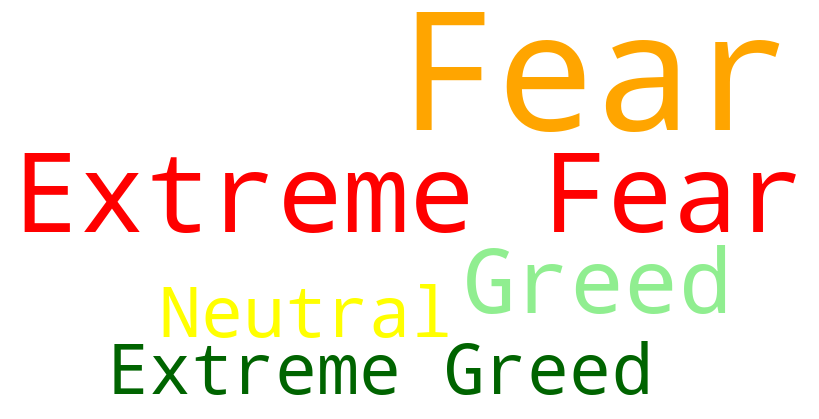

In [144]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Voy a contar la frecuencia de cada valor en la columna 'Value_Classification'.
frecuencias = bitcoin_fomo['Value_Classification'].value_counts().to_dict()

# He creado una función para determinar el color de cara palabra.
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word == "Extreme Fear":
        return "red"  # Color rojo para "Extreme Fear"
    elif word == "Fear":
        return "orange"  # Color naranja para "Fear"
    elif word == "Neutral":
        return "yellow"  # Color verde para "Neutral"
    elif word == "Greed":
        return "lightgreen"  # Color azul para "Greek"
    else:
        return "darkgreen"  # Color púrpura para "Extreme Greek"

# Voy a crear el WordCloud con la función de color que he personalizado.
wordcloud = WordCloud(width = 800, height = 400, background_color ='white', color_func=custom_color_func)
wordcloud.generate_from_frequencies(frecuencias)

# Visualizo el Word Cloud.
plt.figure(figsize = (8, 4), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)

# Mostrar la gráfica
plt.show()

Ahora vamos a mapear los valores de la comlumna Value_Calssification por valores numéricos siguiendo la siguiente realción:
- Extrem Fear, tendrà un valor de -2.
- Fear, tendrà un valor de -1.
- Neutral, tendrá un valor de 0.
- Greek, tendrá un valor de 1.
- Extreme Greed, tendrá un valor de 2.

In [67]:
#mapeo_vc = {
    'Extreme Fear': -2,
    'Fear': -1,
    'Neutral': 0,
    'Greed': 1,
    'Extreme Greed': 2
}

# Voy a mapear los valores de la columna 'Value_Classification' utilizando el diccionario de mapeo_vc.
bit_fom_copy['Value_Classification'] = bit_fom_copy['Value_Classification'].map(mapeo_vc)
print(bit_fom_copy)

            Date  Value  Value_Classification   BTC_Closing   BTC_Volume
0     2018-02-01   30.0                    -1   9170.540039   9959400448
1     2018-02-02   15.0                    -2   8830.750000  12726899712
2     2018-02-03   40.0                    -1   9174.910156   7263790080
3     2018-02-04   24.0                    -2   8277.009766   7073549824
4     2018-02-05   11.0                    -2   6955.270020   9285289984
...          ...    ...                   ...           ...          ...
1880  2023-03-27   64.0                     1  27139.888672  18188895178
1881  2023-03-28   59.0                     1  27268.130859  17783600385
1882  2023-03-29   57.0                     1  28348.441406  20684945906
1883  2023-03-30   60.0                     1  28033.562500  22435349951
1884  2023-03-31   63.0                     1  28478.484375  19001327598

[1885 rows x 5 columns]


In [68]:
bit_fom_copy

,Date,Value,Value_Classification,BTC_Closing,BTC_Volume
0,2018-02-01,30.0,-1,9170.540039,9959400448
1,2018-02-02,15.0,-2,8830.750000,12726899712
2,2018-02-03,40.0,-1,9174.910156,7263790080
3,2018-02-04,24.0,-2,8277.009766,7073549824
4,2018-02-05,11.0,-2,6955.270020,9285289984
...,...,...,...,...,...
1880,2023-03-27,64.0,1,27139.888672,18188895178
1881,2023-03-28,59.0,1,27268.130859,17783600385
1882,2023-03-29,57.0,1,28348.441406,20684945906
1883,2023-03-30,60.0,1,28033.562500,22435349951


#### Variable Date:

In [69]:
#Vamos a modificar el tipo de variable Date de object a fecha.
bit_fom_copy['Date'] = pd.to_datetime(bit_fom_copy['Date'])

In [10]:
bit_fom_copy.info()

NameError: name 'bit_fom_copy' is not defined

In [71]:
#Voy a realizar las buenas practicas y poner las columnas en minúscula y substituir los espacios por "_".
stand_col = []
for i in range(len(bit_fom_copy.columns)):
    stand_col.append(bit_fom_copy.columns[i].lower().replace(' ','_'))
bit_fom_copy.columns = stand_col

In [9]:
bit_fom_copy

NameError: name 'bit_fom_copy' is not defined

In [73]:
# Chequeo los nulos con una función
nulls = pd.DataFrame(bit_fom_copy.isna().sum()/len(bit_fom_copy))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
0,date,0.0
1,value,0.0
2,value_classification,0.0
3,btc_closing,0.0
4,btc_volume,0.0


## 4. Forecasting con Prophet

In [74]:
from prophet import Prophet

In [84]:
diario = bit_fom_copy.resample('D', on = 'date').sum() 
print(diario.shape)
diario.head()

(1885, 4)


,value,value_classification,btc_closing,btc_volume
date,,,,
2018-02-01,30.0,-1,9170.540039,9959400448
2018-02-02,15.0,-2,8830.750000,12726899712
2018-02-03,40.0,-1,9174.910156,7263790080
2018-02-04,24.0,-2,8277.009766,7073549824
2018-02-05,11.0,-2,6955.270020,9285289984


In [85]:
diario.drop(columns = ['value','value_classification','btc_volume',], inplace = True)
diario

,btc_closing
date,
2018-02-01,9170.540039
2018-02-02,8830.750000
2018-02-03,9174.910156
2018-02-04,8277.009766
2018-02-05,6955.270020
...,...
2023-03-27,27139.888672
2023-03-28,27268.130859
2023-03-29,28348.441406


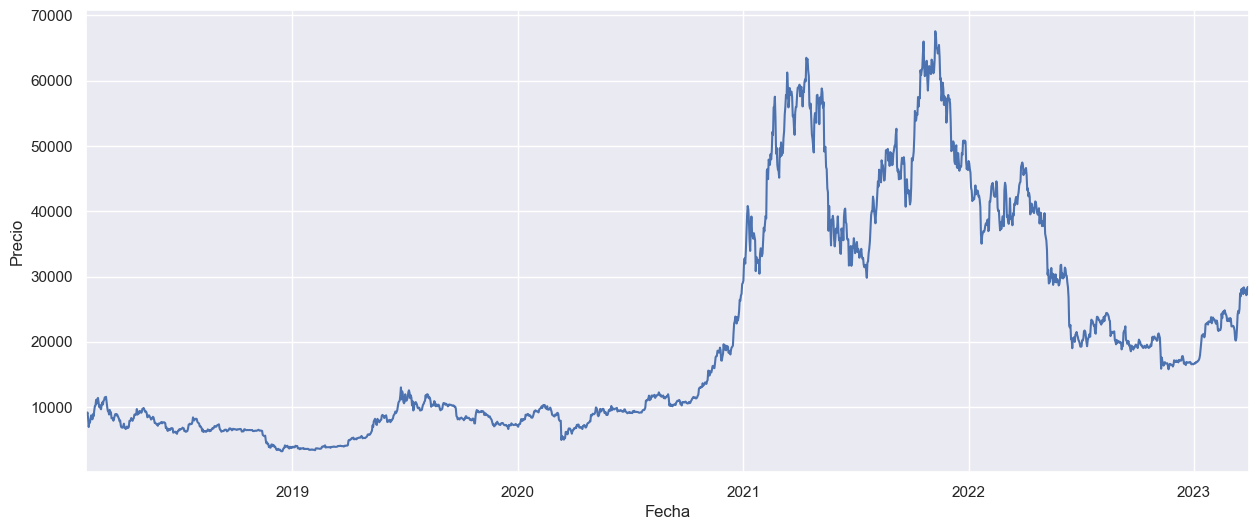

In [145]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.btc_closing)
plt.xlim(datetime.date(2018,2,1), datetime.date(2023,3,31))
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.savefig('gráfico_btc_closing.png')
plt.show()

In [87]:
#Estructura para alimentar el modeo.
df = diario.reset_index()
df.rename(columns = {'date':'ds', 'btc_closing':'y'}, inplace = True)
df

,ds,y
0,2018-02-01,9170.540039
1,2018-02-02,8830.750000
2,2018-02-03,9174.910156
3,2018-02-04,8277.009766
4,2018-02-05,6955.270020
...,...,...
1880,2023-03-27,27139.888672
1881,2023-03-28,27268.130859
1882,2023-03-29,28348.441406
1883,2023-03-30,28033.562500


Para ajustar el modelo, creamos un nuevo objeto llamado Prophet. En este objeto, configuramos cómo queremos que se realice el pronóstico. Después, utilizamos el método 'fit' para entrenar el modelo con nuestros datos históricos.

In [88]:
m = Prophet() #m es el objeto Prophet que entrena el objeto, Prophet solo con dos columnas.
m.fit(df)#Entreno un objeto prophet.

01:01:54 - cmdstanpy - INFO - Chain [1] start processing
01:01:54 - cmdstanpy - INFO - Chain [1] done processing


In [89]:
# Genero un Dataframe con un año más pero sin datos.
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2245,2024-03-26
2246,2024-03-27
2247,2024-03-28
2248,2024-03-29
2249,2024-03-30


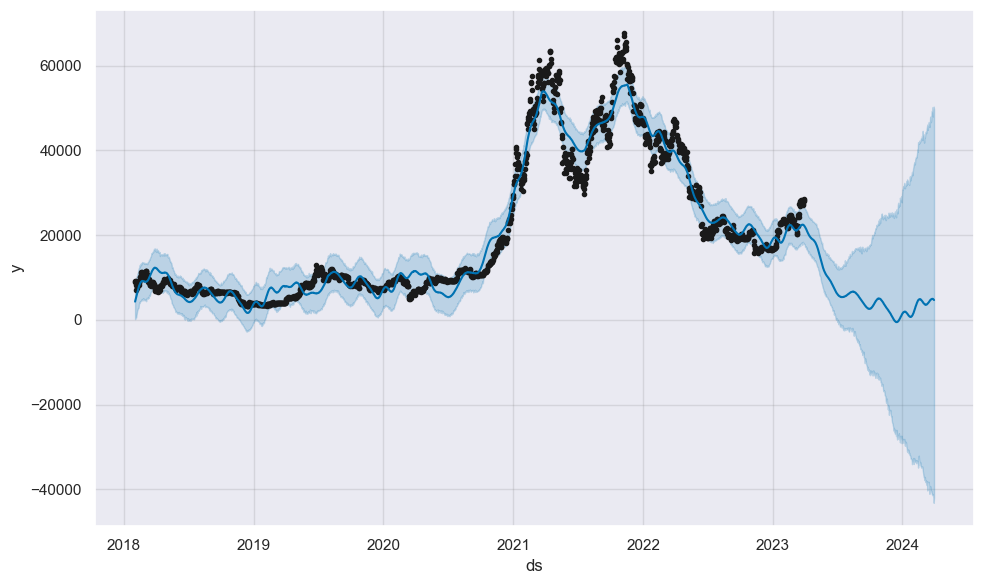

In [147]:
forecast = m.predict(future) #le llamamos future por ser el futuro.
fig1 = m.plot(forecast) #realizamos el grafico.
plt.savefig('gráfico_pronostico.png')

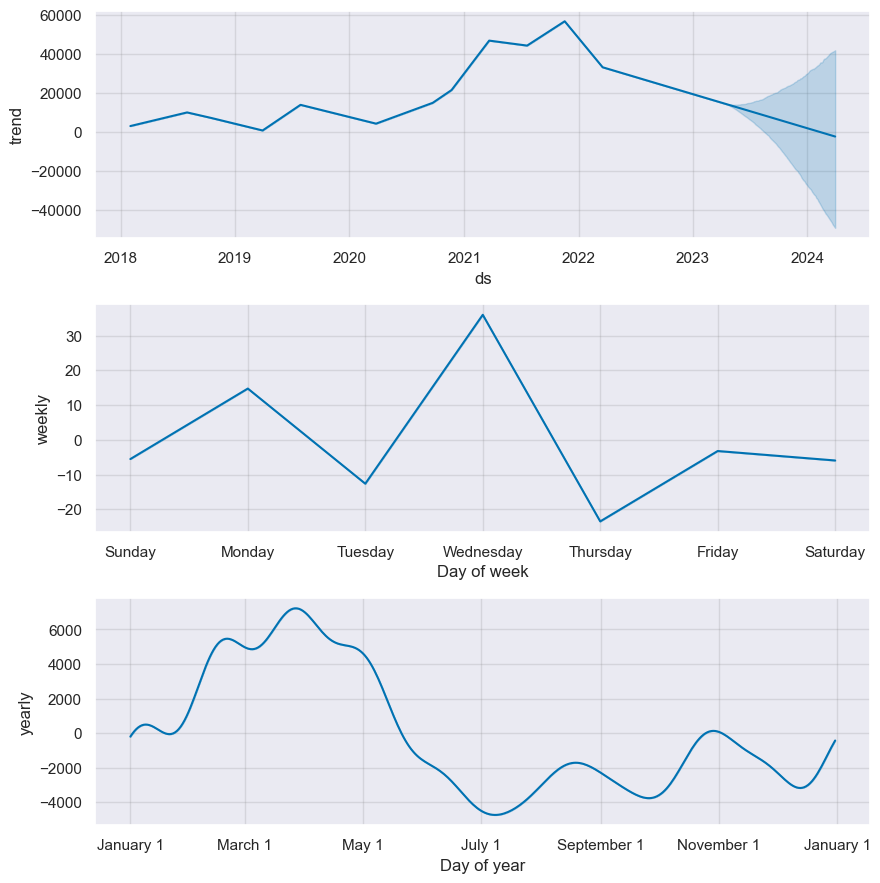

In [149]:
# Ploteamos los componentes para que me diga como llega a esta predicción. 
# El "triangulo/cono" es sobre lo que oscila.
fig2 = m.plot_components(forecast)
fig2.savefig('gráfico_componentes_pronóstico.png')

In [130]:
#bit_fom_copy.to_csv('bit_fom_copy.csv', index=False)
He extraido el csv para poder graficar a través de Tableau más adelante.

## Análisis de Datos Exploratorio (EDA) (2)

El objetivo de este apartado es comprender mejor los datos con los que estamos trabajando. Voy a trabajar con el Dataframe `bit_fom_copy`

- 1.- Visualización de Datos
Histogramas y boxplots para cada columna numérica (value, btc_closing, btc_volume) para así entender la distribución de los datos.

Gráficos de series temporales para btc_closing y btc_volume para observar tendencias a lo largo del tiempo.

- 2.- Estadísticas Descriptivas
Cálculo de medidas de tendencia central y dispersión (media, mediana, desviación estándar).
Correlaciones entre variables para identificar relaciones preliminares.

In [153]:
# Visualización de las primeras filas del DataFrame
bit_fom_copy.head()

,date,value,value_classification,btc_closing,btc_volume
0,2018-02-01,30.0,-1,9170.540039,9959400448
1,2018-02-02,15.0,-2,8830.750000,12726899712
2,2018-02-03,40.0,-1,9174.910156,7263790080
3,2018-02-04,24.0,-2,8277.009766,7073549824
4,2018-02-05,11.0,-2,6955.270020,9285289984


In [164]:
# Visualización de las primeras filas del DataFrame
bit_fom_copy.describe()

,date,value,value_classification,btc_closing,btc_volume
count,1885,1885.000000,1885.000000,1885.000000,1.885000e+03
mean,2020-08-31 00:00:00.000000256,42.362865,-0.529443,20579.140472,2.676660e+10
min,2018-02-01 00:00:00,5.000000,-2.000000,3236.761719,2.923670e+09
25%,2019-05-18 00:00:00,24.000000,-2.000000,7879.071289,1.373184e+10
50%,2020-08-31 00:00:00,39.000000,-1.000000,11429.506836,2.459894e+10
75%,2021-12-15 00:00:00,56.000000,1.000000,32702.025391,3.569001e+10
max,2023-03-31 00:00:00,95.000000,2.000000,67566.828125,3.509679e+11
std,NaN,22.083871,1.327005,16710.842873,1.953785e+10


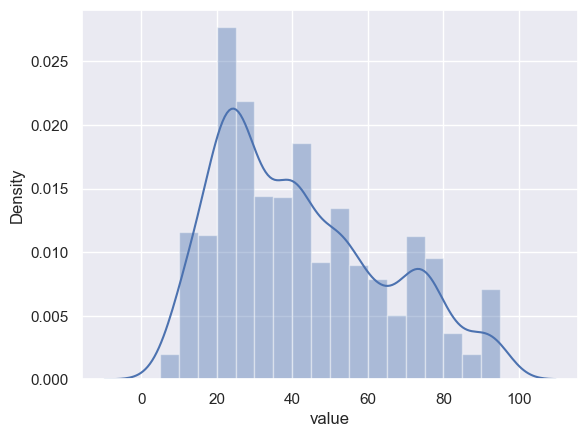

In [125]:
#Grafico de distribución de value
sns.distplot(bit_fom_copy['value'])
plt.show()

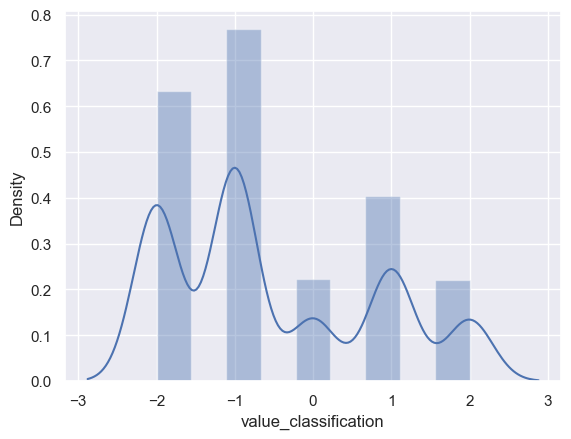

In [126]:
#Gráfico de distribución de value_classification
sns.distplot(bit_fom_copy['value_classification'])
plt.show()

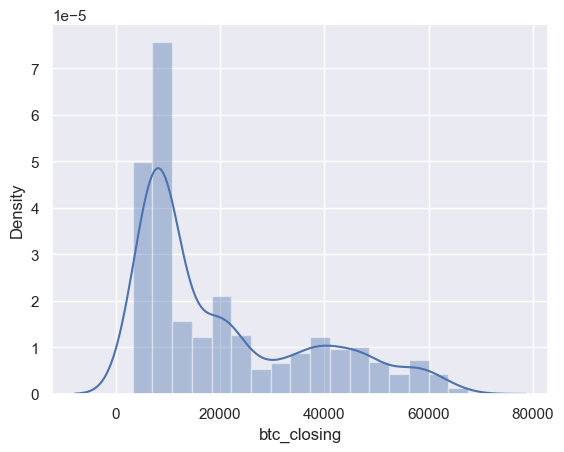

In [128]:
#Gráfico de distribución de BTC_Closing
sns.distplot(bit_fom_copy['btc_closing'])
plt.show()

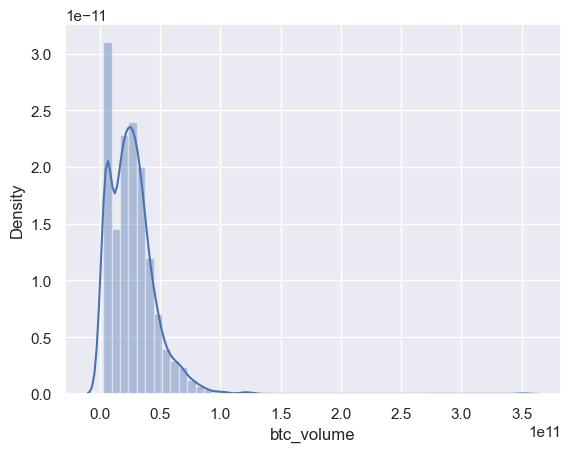

In [129]:
# Gráfico de distribución de btc_volume
sns.distplot(bit_fom_copy['btc_volume'])
plt.show()

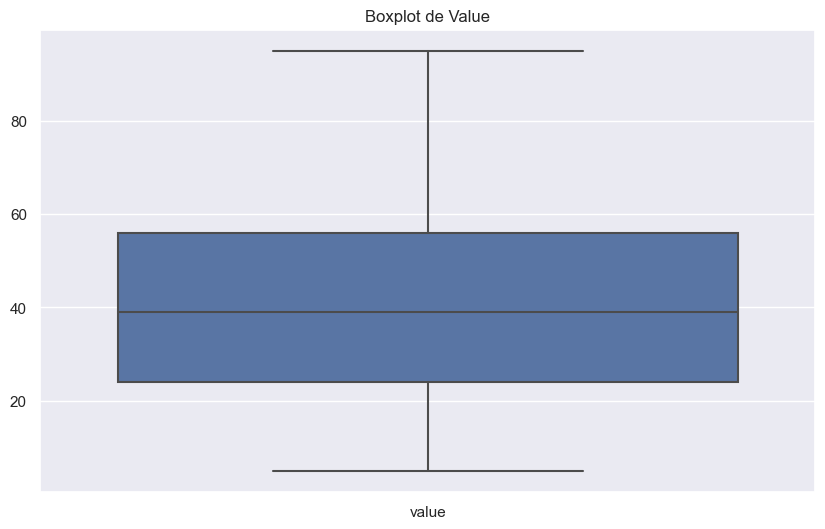

In [161]:
# Boxplots para visualizar distribuciones y detectar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=bit_fom_copy[['value']])
plt.title("Boxplot de Value")
plt.show()

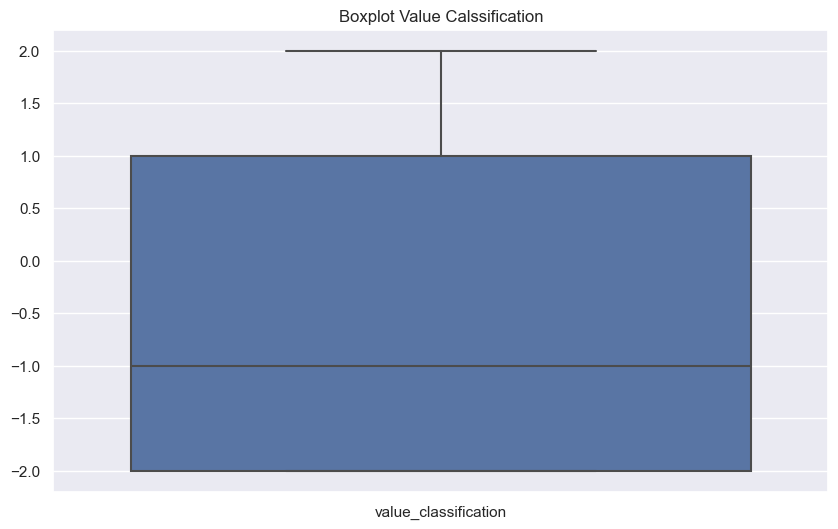

In [17]:
# Boxplots para visualizar distribuciones y detectar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=bit_fom_copy[['value_classification']])
plt.title("Boxplot Value Calssification")
plt.show()

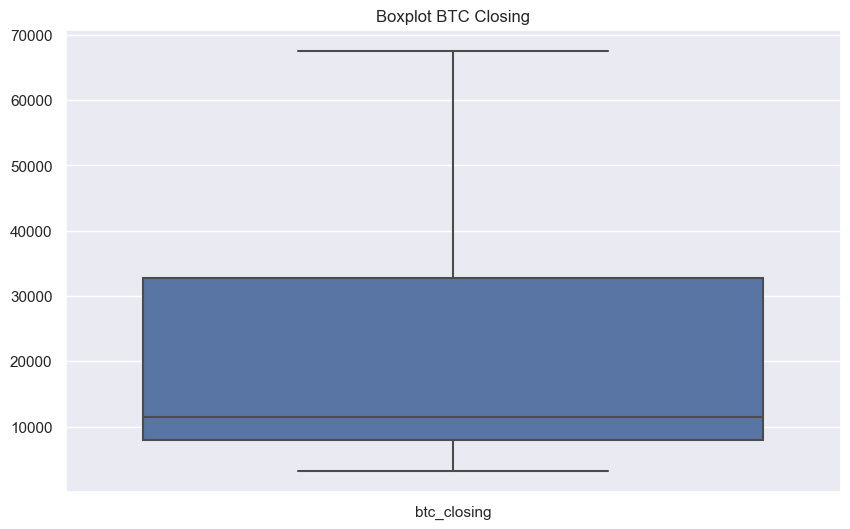

In [162]:
# Boxplots para visualizar distribuciones y detectar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=bit_fom_copy[['btc_closing']])
plt.title("Boxplot BTC Closing")
plt.show()

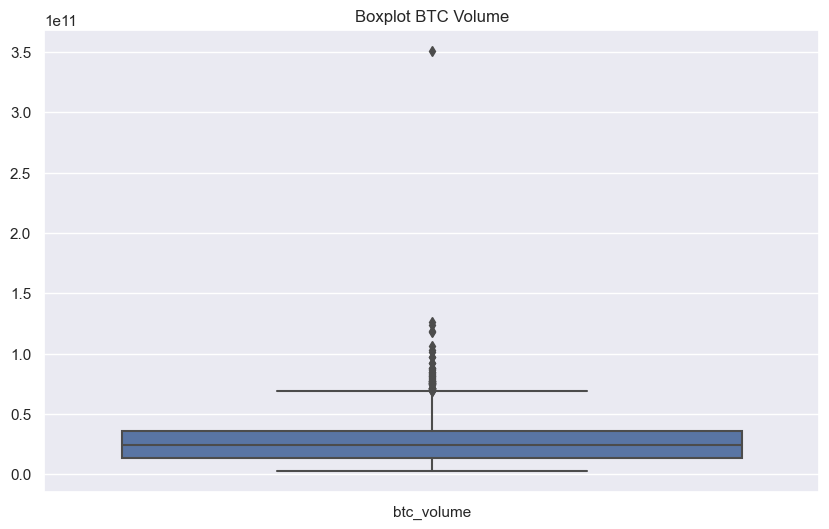

In [163]:
# Boxplots para visualizar distribuciones y detectar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=bit_fom_copy[['btc_volume']])
plt.title("Boxplot BTC Volume")
plt.show()

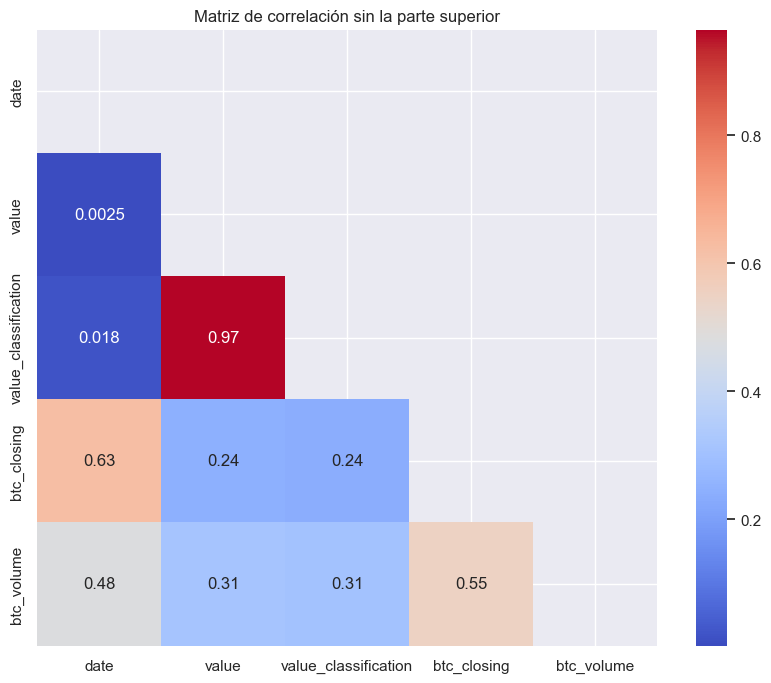

In [168]:
# Obtener la matriz de correlación
correlation_matrix = bit_fom_copy.corr()

# Crear una máscara para la parte superior de la matriz
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generar la matriz de correlación con la máscara
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.title("Matriz de correlación sin la parte superior")
plt.savefig('matriz_correlacion.png')
plt.show()

In [169]:
# Usamos'btc_volume' y 'value' como predictores
X = bit_fom_copy[['btc_volume', 'value']]
y = bit_fom_copy['btc_closing']

# Añadiendo una constante al modelo
X = sm.add_constant(X)

In [170]:
# Ajustando el modelo
model = sm.OLS(y, X).fit()

# Mostrando el resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            btc_closing   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     416.3
Date:                Wed, 08 May 2024   Prob (F-statistic):          2.01e-150
Time:                        12:28:22   Log-Likelihood:                -20658.
No. Observations:                1885   AIC:                         4.132e+04
Df Residuals:                    1882   BIC:                         4.134e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5987.7785    741.260      8.078      0.0

Obtenemos que no es un modelo robusto y que nuestro r2 es de 0.3, al igual que el Pvalue tanto de `btc_volume` como de `value`, son 0.

## Ingeniería de Funciones (Transformación, Selección, Generación)

Voy a transformar y crear nuevas variables puede ayudar a mejorar la eficacia de los modelos de machine learning.

In [ ]:
# Añado 3 nuevas columnas que son año, mes y día
bit_fom_copy['year'] = bit_fom_copy['date'].dt.year
bit_fom_copy['month'] = bit_fom_copy['date'].dt.month
bit_fom_copy['day'] = bit_fom_copy['date'].dt.day

# Creo de una columna de media móvil de 7 días para btc_closing
bit_fom_copy['btc_closing_7d_avg'] = bit_fom_copy['btc_closing'].rolling(window=7).mean()

# Normalización de columnas 'btc_closing' y 'btc_volume'
scaler = MinMaxScaler()

bit_fom_copy[['btc_closing', 'btc_volume']] = scaler.fit_transform(bit_fom_copy[['btc_closing', 'btc_volume']])

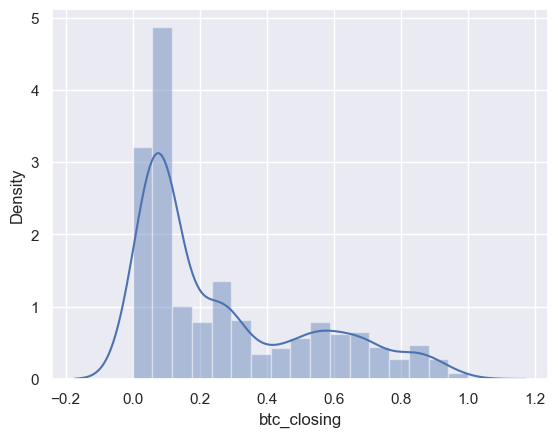

In [175]:
#Gráfico de distribución de btc_closing
sns.distplot(bit_fom_copy['btc_closing'])
plt.show()

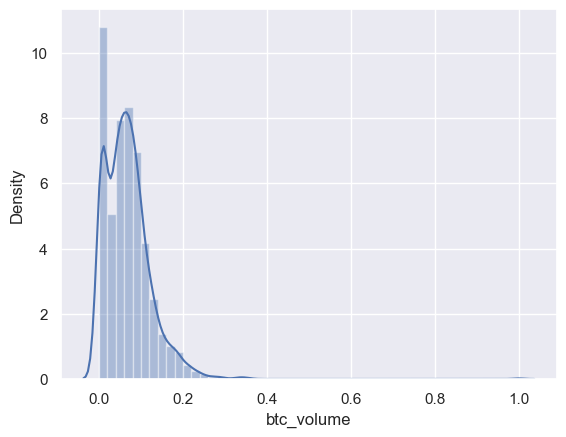

In [176]:
#Gráfico de distribución de btc_volume
sns.distplot(bit_fom_copy['btc_volume'])
plt.show()

## Preprocesamiento para Regresión Lineal

Antes de modelar, voy a preparar los datos adecuadamente, incluyendo la selección de características y el manejo de multicolinealidad. He encontrado esta función VIF que cuantifica la intensidad de la multicolinealidad. Que variable afecta más.

In [172]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Función para calcular VIF
def calculate_vif(data):
    vif = pd.DataFrame()
    vif["Variables"] = data.columns
    vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif

# Calcular VIF en las variables seleccionadas
print(calculate_vif(bit_fom_copy[['value', 'btc_closing', 'btc_volume']]))

     Variables       VIF
0        value  2.700282
1  btc_closing  2.947601
2   btc_volume  3.615495


In [173]:
# Usamos'btc_volume' y 'value' como predictores
X = bit_fom_copy[['btc_volume', 'value']]
y = bit_fom_copy['btc_closing']

# Añadiendo una constante al modelo
X = sm.add_constant(X)

In [174]:
# Ajustando el modelo
model = sm.OLS(y, X).fit()

# Mostrando el resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            btc_closing   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     416.3
Date:                Wed, 08 May 2024   Prob (F-statistic):          2.01e-150
Time:                        12:43:49   Log-Likelihood:                 211.96
No. Observations:                1885   AIC:                            -417.9
Df Residuals:                    1882   BIC:                            -401.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0631      0.011      5.598      0.0

### Interpretación de resultados:
- R-squared, tiene que ser 0,5 o mayor para que sea fiable.
coef- es importante
- P>, cuanto más cerca este de 0 la varible es significativa. A partir de 0,1 ya no es significativo.

## Modelado de Regresión Lineal

Finalmente, modelar los datos para predecir btc_closing.

In [260]:
# Divido los datos en el para el Test y el Train
X = bit_fom_copy[['value', 'btc_volume']]
y = bit_fom_copy['btc_closing']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
print("R^2 Score:", {r2_score(y_test, y_pred)})
print("RMSE:", {mean_squared_error(y_test, y_pred, squared=False)})

R^2 Score: {0.2961269184193249}
RMSE: {0.21697005718371426}


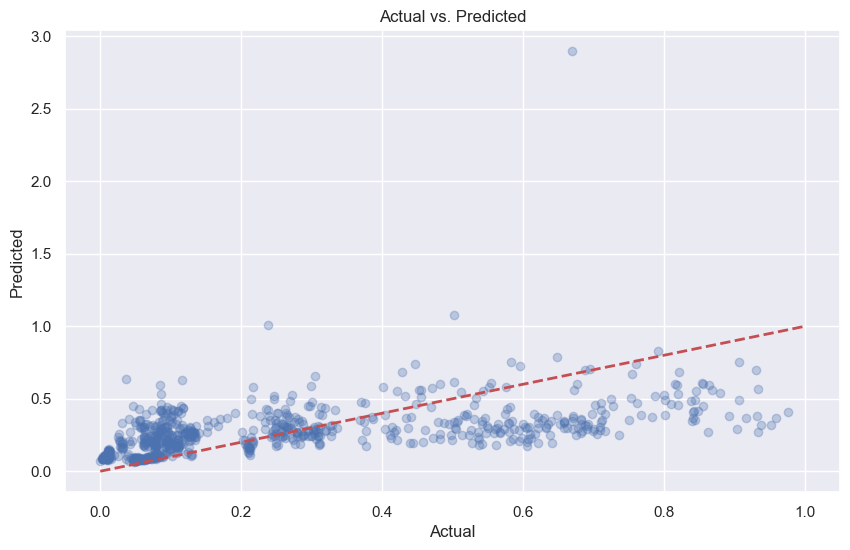

In [188]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [259]:
# Transformar y crear nuevas características.
bit_fom_copy['log_volume'] = np.log(bit_fom_copy['btc_volume'] + 1)  # Log transformación para normalizar la distribución
bit_fom_copy['value_squared'] = bit_fom_copy['value'] ** 2  # Añadiendo término polinómico para 'value'

# Selecciono variables para el modelo.
X = bit_fom_copy[['btc_volume', 'log_volume', 'value', 'value_squared']]
y = bit_fom_copy['btc_closing']

# Normalizado las características para mejorar el rendimiento del modelo.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divido los datos en conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.8, random_state=42)

# Ajustamos el modelo.
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluamos el modelo.
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

R^2 Score: 0.3538143295192172


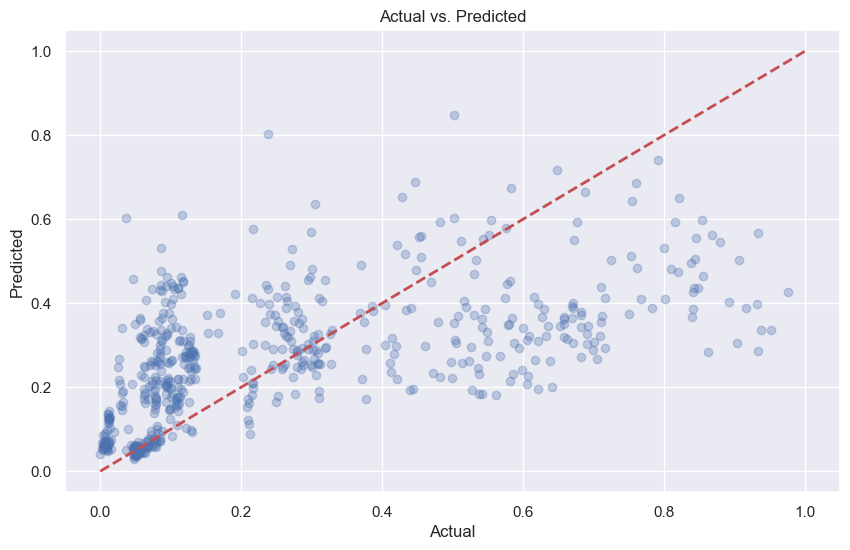

In [198]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

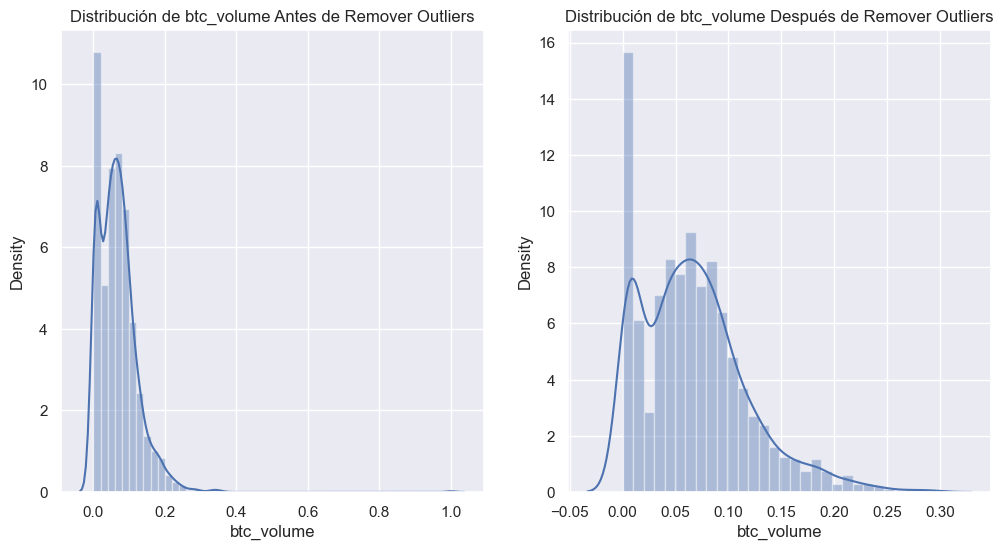

In [206]:
# Calcular IQR para btc_volume
iqr = np.percentile(bit_fom_copy['btc_volume'], 75) - np.percentile(bit_fom_copy['btc_volume'], 25)

# Calcular los límites superior e inferior usando 3 veces IQR, que es más restrictivo y elimina outliers extremos
upper_limit = np.percentile(bit_fom_copy['btc_volume'], 75) + 3.5 * iqr
lower_limit = np.percentile(bit_fom_copy['btc_volume'], 25) - 3.5 * iqr

# Filtrar los datos para remover outliers
filtered_data = bit_fom_copy[(bit_fom_copy['btc_volume'] > lower_limit) & (bit_fom_copy['btc_volume'] < upper_limit)]

# Visualización antes y después de remover outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.distplot(bit_fom_copy['btc_volume'])
plt.title('Distribución de btc_volume Antes de Remover Outliers')

plt.subplot(1, 2, 2)
sns.distplot(filtered_data['btc_volume'])
plt.title('Distribución de btc_volume Después de Remover Outliers')
plt.show()

### CURIOSIDADES

In [230]:
df=bitcoin_fomo

In [231]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.strftime('%Y')
df['Month'] = df['Date'].dt.strftime('%m')

In [232]:
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df.index=df['Date']

df.drop('Date',axis=1,inplace=True)

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1885 entries, 2018-02-01 to 2023-03-31
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Value                 1882 non-null   float64
 1   Value_Classification  1882 non-null   object 
 2   BTC_Closing           1885 non-null   float64
 3   BTC_Volume            1885 non-null   int64  
 4   Year                  1885 non-null   object 
 5   Month                 1885 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 103.1+ KB


In [234]:
df['Month'].unique()

array(['02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '01'], dtype=object)

In [235]:
df['Month'] = df['Month'].replace(['01','02','03','04','05','06','07','08','09','10','11','12'], 
                                 ['January','February','March','April','May','June','July','August',
                                  'September','October','November','December'])

In [236]:
df.head()

,Value,Value_Classification,BTC_Closing,BTC_Volume,Year,Month
Date,,,,,,
2018-02-01,30.0,Fear,9170.540039,9959400448,2018,February
2018-02-02,15.0,Extreme Fear,8830.750000,12726899712,2018,February
2018-02-03,40.0,Fear,9174.910156,7263790080,2018,February
2018-02-04,24.0,Extreme Fear,8277.009766,7073549824,2018,February
2018-02-05,11.0,Extreme Fear,6955.270020,9285289984,2018,February


Text(0.5, 1.0, 'Bitcoin fear and greed index per Year  - 1 Feb 2018 to 31 Mar 2023')

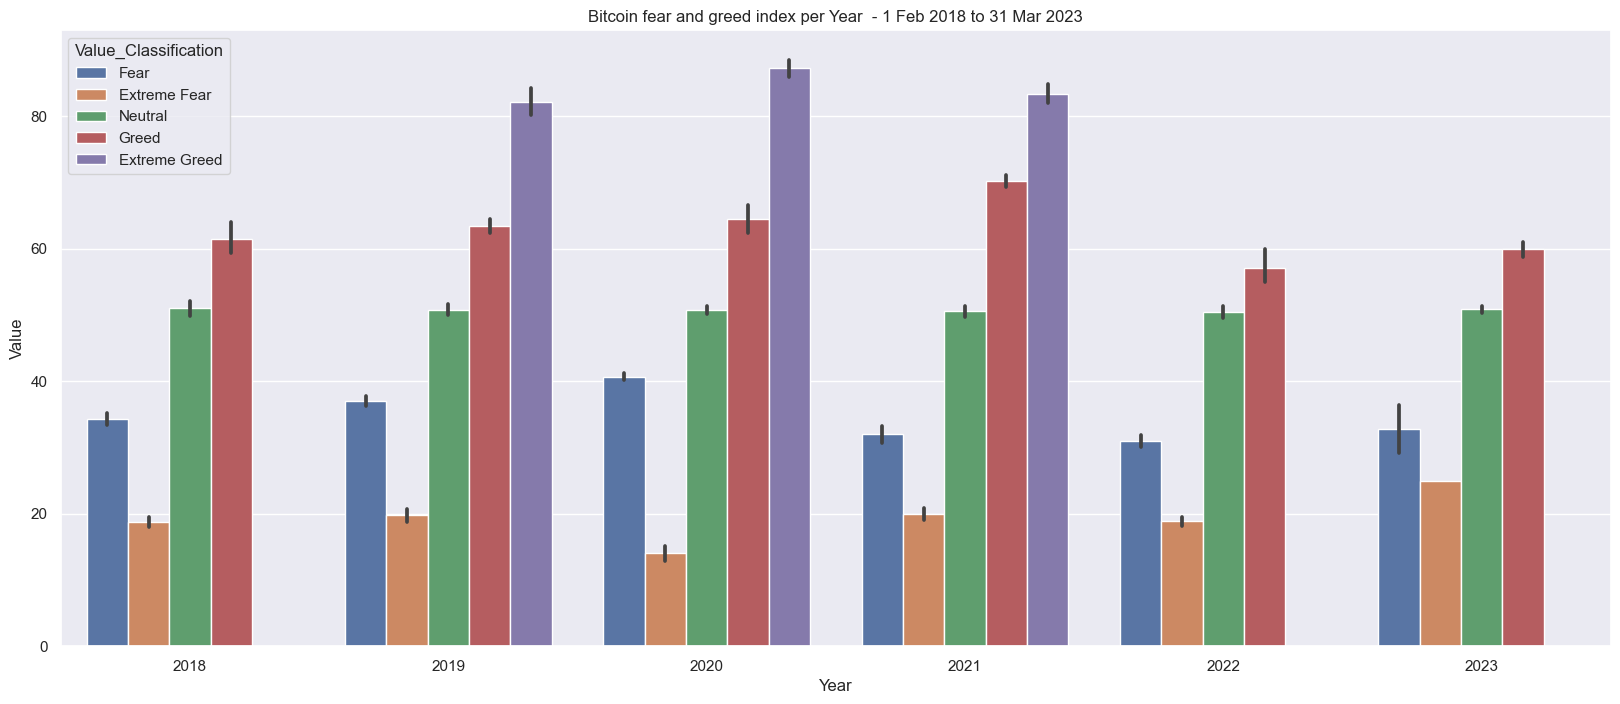

In [237]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(x='Year',y='Value',hue='Value_Classification',data=df,width=.8,ax=ax)
plt.title('Bitcoin fear and greed index per Year  - 1 Feb 2018 to 31 Mar 2023')

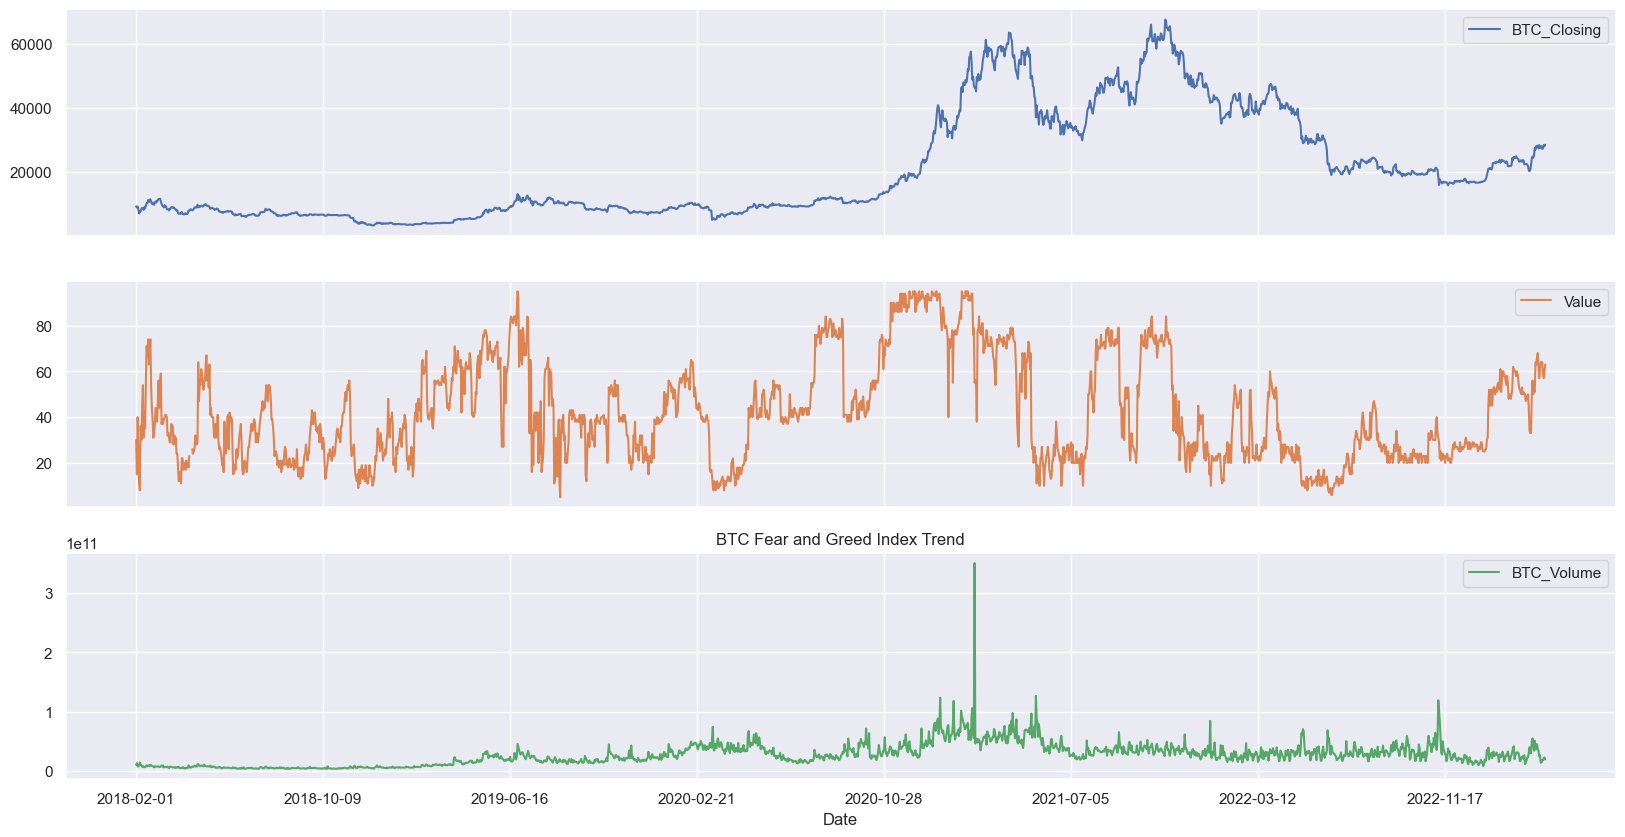

In [238]:
df[['BTC_Closing','Value','BTC_Volume']].plot(subplots=True, figsize=(20,10))
plt.title('Tendencia del índice de miedo y codicia de BTC')
plt.show()

In [252]:
# Encontrar el índice del valor máximo en la columna 'value'
max_value_index = bit_fom_copy['value'].idxmax()
max_value_row = bit_fom_copy.loc[max_value_index]
max_value_row

date                    2019-06-26 00:00:00
value                                  95.0
value_classification                      2
btc_closing                         0.15202
btc_volume                         0.121197
year                                   2019
month                                     6
day                                      26
btc_closing_7d_avg              11006.71861
log_volume                         0.114397
value_squared                        9025.0
btc_closing_diff                   0.019047
Name: 510, dtype: object

#### Que paso el 26.06.2019
https://www.infobae.com/economia/finanzas-y-negocios/2019/06/26/otra-vez-por-las-nubes-el-bitcoin-puede-llegar-a-valer-este-ano-30-000-dolares-o-mas/

In [254]:
# Encontrar el índice del valor mínimo en la columna 'value'
min_value_index = bit_fom_copy['value'].idxmin()
min_value_row = bit_fom_copy.loc[min_value_index]
min_value_row

date                    2019-08-22 00:00:00
value                                   5.0
value_classification                     -2
btc_closing                        0.107171
btc_volume                         0.040724
year                                   2019
month                                     8
day                                      22
btc_closing_7d_avg             10414.326451
log_volume                         0.039917
value_squared                          25.0
btc_closing_diff                  -0.000109
Name: 567, dtype: object

#### Que paso el 22.08.2019
https://ajtapia.com/2019/07/el-bitcoin-no-es-dinero-sino-un-activo-inmaterial-de-contraprestacion-o-de-intercambio-sentencia-de-la-sala-de-lo-penal-del-tribunal-supremo-de-20-de-junio-de-2019-vida-milagros-y-riesgos-de-las-c/

In [256]:
# Día con el mayor volumen de BTC
max_volume_day = bit_fom_copy['btc_volume'].idxmax()
print(f"Día con el mayor volumen de BTC: {bit_fom_copy.loc[max_volume_day, 'date']}")

Día con el mayor volumen de BTC: 2021-02-26 00:00:00


In [225]:
bitcoin_fomo['Date'] = pd.to_datetime(bitcoin_fomo['Date'])
max_closing_index = bitcoin_fomo['BTC_Closing'].idxmax()
max_closing_day = bitcoin_fomo.loc[max_closing_index, 'Date']
max_closing_value = bitcoin_fomo.loc[max_closing_index, 'BTC_Closing']

print(f"El día con el valor más alto de cierre de BTC es: {max_closing_day}")
print(f"El valor de cierre máximo de BTC ese día es: {max_closing_value}")

El día con el valor más alto de cierre de BTC es: 2021-11-08 00:00:00
El valor de cierre máximo de BTC ese día es: 67566.828125


#### Que paso el 08.11.2021
https://www.criptonoticias.com/mercados/precio-bitcoin-alcanza-nuevo-tope-historico-67600-dolares/